Analysis focusing on general feature statistics and how they may contribute to the prediction of classes. Analyses is focused on the entire dataset. 

In [7]:
import pandas as pd 
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [8]:
import sys
sys.path.append('..')

In [9]:
# import helper functions, refer to script files for documentation and details
from scripts.eda_helper.correlation_checker import check_variable_correlations, check_fraud_correlations

In [10]:
df = pd.read_csv('../data/processed/creditcard_fe.csv')

In [11]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    print(f"{col}: {missing_count} missing values")

Time: 0 missing values
V1: 0 missing values
V2: 0 missing values
V3: 0 missing values
V4: 0 missing values
V5: 0 missing values
V6: 0 missing values
V7: 0 missing values
V8: 0 missing values
V9: 0 missing values
V10: 0 missing values
V11: 0 missing values
V12: 0 missing values
V13: 0 missing values
V14: 0 missing values
V15: 0 missing values
V16: 0 missing values
V17: 0 missing values
V18: 0 missing values
V19: 0 missing values
V20: 0 missing values
V21: 0 missing values
V22: 0 missing values
V23: 0 missing values
V24: 0 missing values
V25: 0 missing values
V26: 0 missing values
V27: 0 missing values
V28: 0 missing values
Amount: 0 missing values
Class: 0 missing values
Hour: 0 missing values
Hour_sin: 0 missing values
Day: 0 missing values
log_Amount: 0 missing values
Time_bin: 0 missing values
Amount_bin: 0 missing values


In [12]:
# Check variance across all classes, check for very low variance or zero variance columns
print(df.var().sort_values())

Class         1.724507e-03
V28           1.089550e-01
V27           1.629192e-01
V26           2.325429e-01
Day           2.499309e-01
V25           2.717308e-01
V24           3.668084e-01
V23           3.899507e-01
Hour_sin      4.232008e-01
V22           5.266428e-01
V21           5.395255e-01
V20           5.943254e-01
V19           6.626619e-01
Amount_bin    6.707432e-01
V18           7.025394e-01
V17           7.213734e-01
V16           7.678191e-01
V15           8.378034e-01
Time_bin      9.056506e-01
V14           9.189055e-01
V13           9.905708e-01
V12           9.984034e-01
V11           1.041855e+00
V10           1.185594e+00
V9            1.206992e+00
V8            1.426479e+00
V7            1.530401e+00
V6            1.774946e+00
V5            1.905081e+00
V4            2.004684e+00
V3            2.299029e+00
V2            2.726820e+00
V1            3.836489e+00
log_Amount    5.275951e+00
Hour          3.405720e+01
Amount        6.256007e+04
Time          2.255124e+09
d

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time        284807 non-null  float64
 1   V1          284807 non-null  float64
 2   V2          284807 non-null  float64
 3   V3          284807 non-null  float64
 4   V4          284807 non-null  float64
 5   V5          284807 non-null  float64
 6   V6          284807 non-null  float64
 7   V7          284807 non-null  float64
 8   V8          284807 non-null  float64
 9   V9          284807 non-null  float64
 10  V10         284807 non-null  float64
 11  V11         284807 non-null  float64
 12  V12         284807 non-null  float64
 13  V13         284807 non-null  float64
 14  V14         284807 non-null  float64
 15  V15         284807 non-null  float64
 16  V16         284807 non-null  float64
 17  V17         284807 non-null  float64
 18  V18         284807 non-null  float64
 19  V1

Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

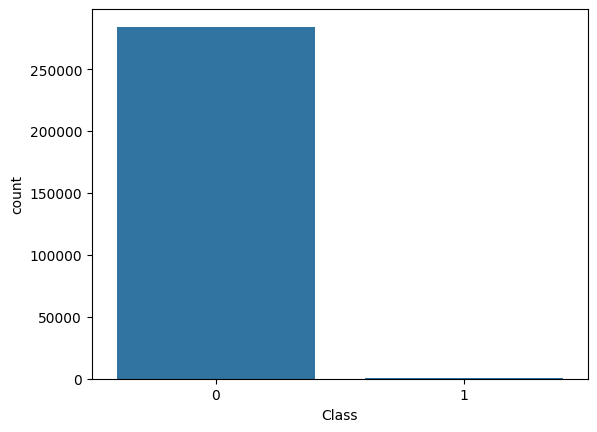

In [14]:
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df) # 0: normal, 1: fraud
# severe class imbalance, only 492 frauds out of 284,807 transactions

In [15]:
corr_matrix = df.corr()
print(corr_matrix)

                Time            V1            V2            V3            V4  \
Time        1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1          0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2         -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3         -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4         -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5          0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6         -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7          0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8         -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9         -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10         0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11        -0.247689  2.125498e-16  1.97

=== VARIABLE CORRELATION ANALYSIS ===

Top 25 highest correlations between variables:
      var1       var2  correlation
      Hour   Time_bin     0.957930
      Time        Day     0.896490
  Hour_sin   Time_bin    -0.792981
log_Amount Amount_bin     0.781936
      Hour   Hour_sin    -0.767027
        V2     Amount    -0.531409
        V3        Day    -0.450604
    Amount log_Amount     0.435714
      Time         V3    -0.419618
      Time       Hour     0.415575
      Time   Time_bin     0.399798
        V7     Amount     0.397311
        V5     Amount    -0.386356
    Amount Amount_bin     0.383426
        V2 Amount_bin    -0.375636
        V2 log_Amount    -0.358908
       V12       Hour     0.352459
       V12   Time_bin     0.346555
       V20     Amount     0.339403
      Time   Hour_sin    -0.330015
       V17      Class    -0.326481
       V14      Class    -0.302544
       V12   Hour_sin    -0.280520
       V12      Class    -0.260593
       V15        Day    -0.256086


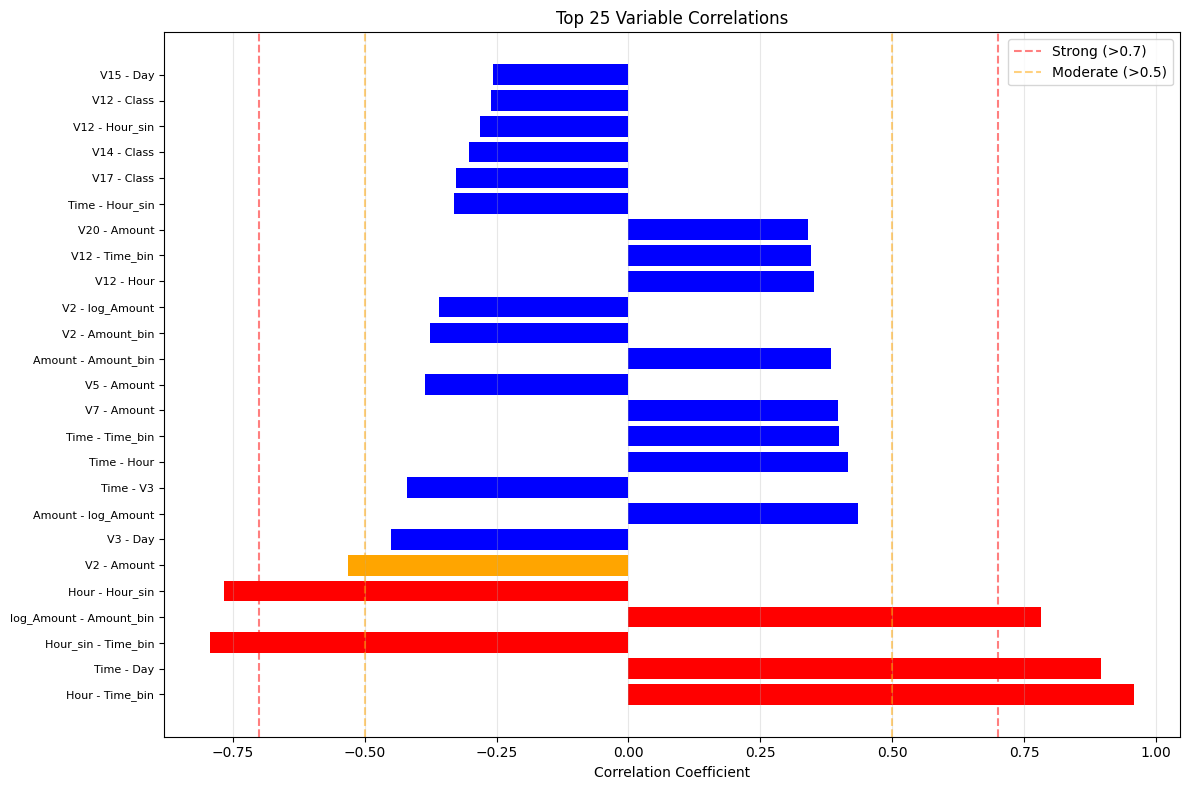

,var1,var2,correlation,abs_correlation
654,Hour,Time_bin,9.579303e-01,9.579303e-01
32,Time,Day,8.964904e-01,8.964904e-01
658,Hour_sin,Time_bin,-7.929807e-01,7.929807e-01
664,log_Amount,Amount_bin,7.819356e-01,7.819356e-01
651,Hour,Hour_sin,-7.670267e-01,7.670267e-01
...,...,...,...,...
235,V7,V12,-3.536655e-18,3.536655e-18
161,V4,V28,-2.761403e-18,2.761403e-18
210,V6,V16,2.623672e-18,2.623672e-18
216,V6,V22,-4.705235e-19,4.705235e-19


In [16]:
check_variable_correlations(df, top_n=25, show_plot=True)


=== FEATURES MOST CORRELATED WITH CLASS ===



Features ranked by absolute correlation with fraud:
 1. V17     : 0.3265
 2. V14     : 0.3025
 3. V12     : 0.2606
 4. V10     : 0.2169
 5. V16     : 0.1965
 6. V3      : 0.1930
 7. V7      : 0.1873
 8. V11     : 0.1549
 9. V4      : 0.1334
10. V18     : 0.1115
11. V1      : 0.1013
12. V9      : 0.0977
13. V5      : 0.0950
14. V2      : 0.0913
15. V6      : 0.0436
16. V21     : 0.0404
17. V19     : 0.0348
18. log_Amount: 0.0208
19. V20     : 0.0201
20. V8      : 0.0199
21. Time_bin: 0.0183
22. V27     : 0.0176
23. Hour    : 0.0171
24. Time    : 0.0123
25. Hour_sin: 0.0120
26. V28     : 0.0095
27. V24     : 0.0072
28. Amount_bin: 0.0059
29. Amount  : 0.0056
30. Day     : 0.0052
31. V13     : 0.0046
32. V26     : 0.0045
33. V15     : 0.0042
34. V25     : 0.0033
35. V23     : 0.0027
36. V22     : 0.0008


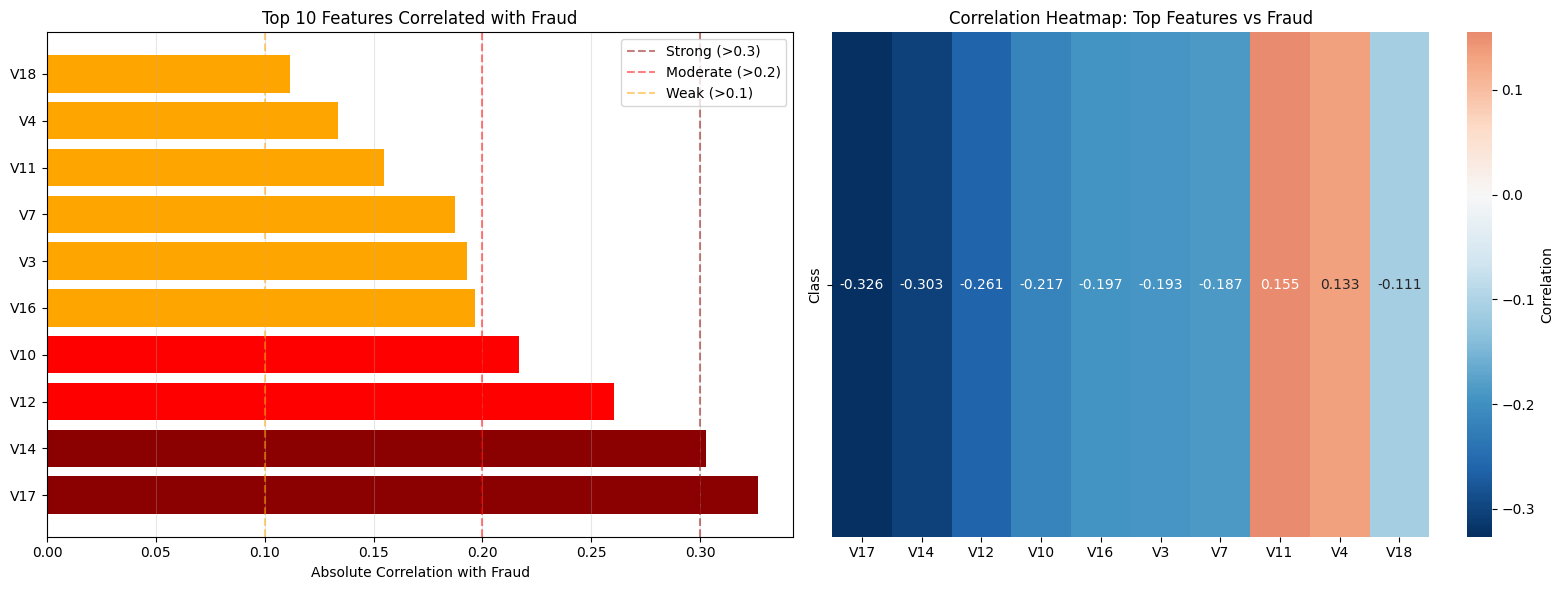


Features with |correlation| > 0.1 with Class:
  V17: 0.3265
  V14: 0.3025
  V12: 0.2606
  V10: 0.2169
  V16: 0.1965
  V3: 0.1930
  V7: 0.1873
  V11: 0.1549
  V4: 0.1334
  V18: 0.1115
  V1: 0.1013


In [17]:
fraud_corr = check_fraud_correlations(df, target_column='Class', show_plot=True)

In [18]:
"""
Check feature importance using Mutual Information (MI) to identify features that have the strongest relationship with the target variable 'Class'.
This helps in feature selection and understanding which features contribute most to predicting fraud.
Higher MI score indicates a stronger relationship with the target variable (0-1 scale).
"""

X = df.drop('Class', axis=1)
y = df['Class']

mi_scores = mutual_info_classif(
    X, y,
    discrete_features=False,  # All features are continuous
    n_neighbors=5,           # Slightly more smoothing for noisy data
    random_state=42          # Reproducible results
)

mi_scores_df = pd.DataFrame({
        'Feature': X.columns,
        'MI_Score': mi_scores
    }).sort_values('MI_Score', ascending=False)

       Feature  MI_Score
32         Day  0.022880
35  Amount_bin  0.012557
34    Time_bin  0.011785
17         V17  0.008191
14         V14  0.008082
12         V12  0.007587
10         V10  0.007541
11         V11  0.006775
16         V16  0.006163
4           V4  0.004941
3           V3  0.004828
9           V9  0.004310
18         V18  0.004255
7           V7  0.004061
2           V2  0.003261
31    Hour_sin  0.002999
21         V21  0.002520
27         V27  0.002413
5           V5  0.002330
6           V6  0.002271
30        Hour  0.002098
1           V1  0.002017
8           V8  0.001812
28         V28  0.001775
33  log_Amount  0.001522
0         Time  0.001506
29      Amount  0.001414
19         V19  0.001199
20         V20  0.001091
23         V23  0.000819
24         V24  0.000576
25         V25  0.000411
26         V26  0.000407
22         V22  0.000313
15         V15  0.000273
13         V13  0.000224


C:\Users\Admin\AppData\Local\Temp\ipykernel_19160\2695769006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_scores_df, x='Feature', y='MI_Score', palette='Blues_d')


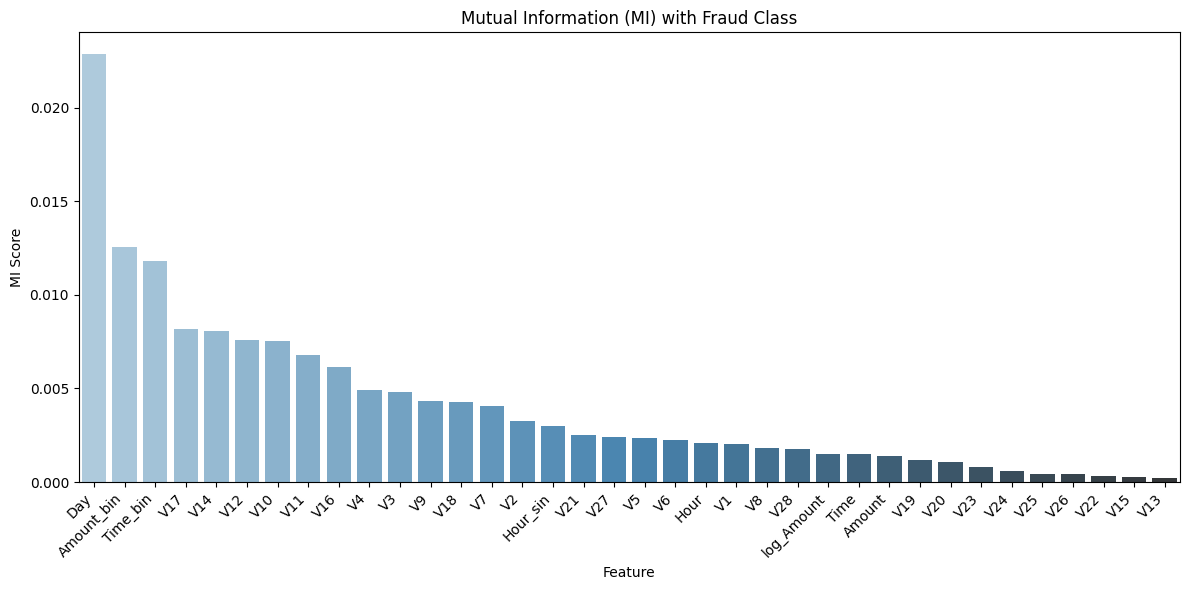

In [19]:
print(mi_scores_df)
plt.figure(figsize=(12,6))
sns.barplot(data=mi_scores_df, x='Feature', y='MI_Score', palette='Blues_d')
plt.title('Mutual Information (MI) with Fraud Class')
plt.ylabel('MI Score')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
top_corr_features = fraud_corr.abs().sort_values(ascending=False).head(10).index.tolist()
top_mi_features = mi_scores_df.sort_values('MI_Score', ascending=False).head(10)['Feature'].tolist()
top_features = list(dict.fromkeys(top_corr_features + top_mi_features))

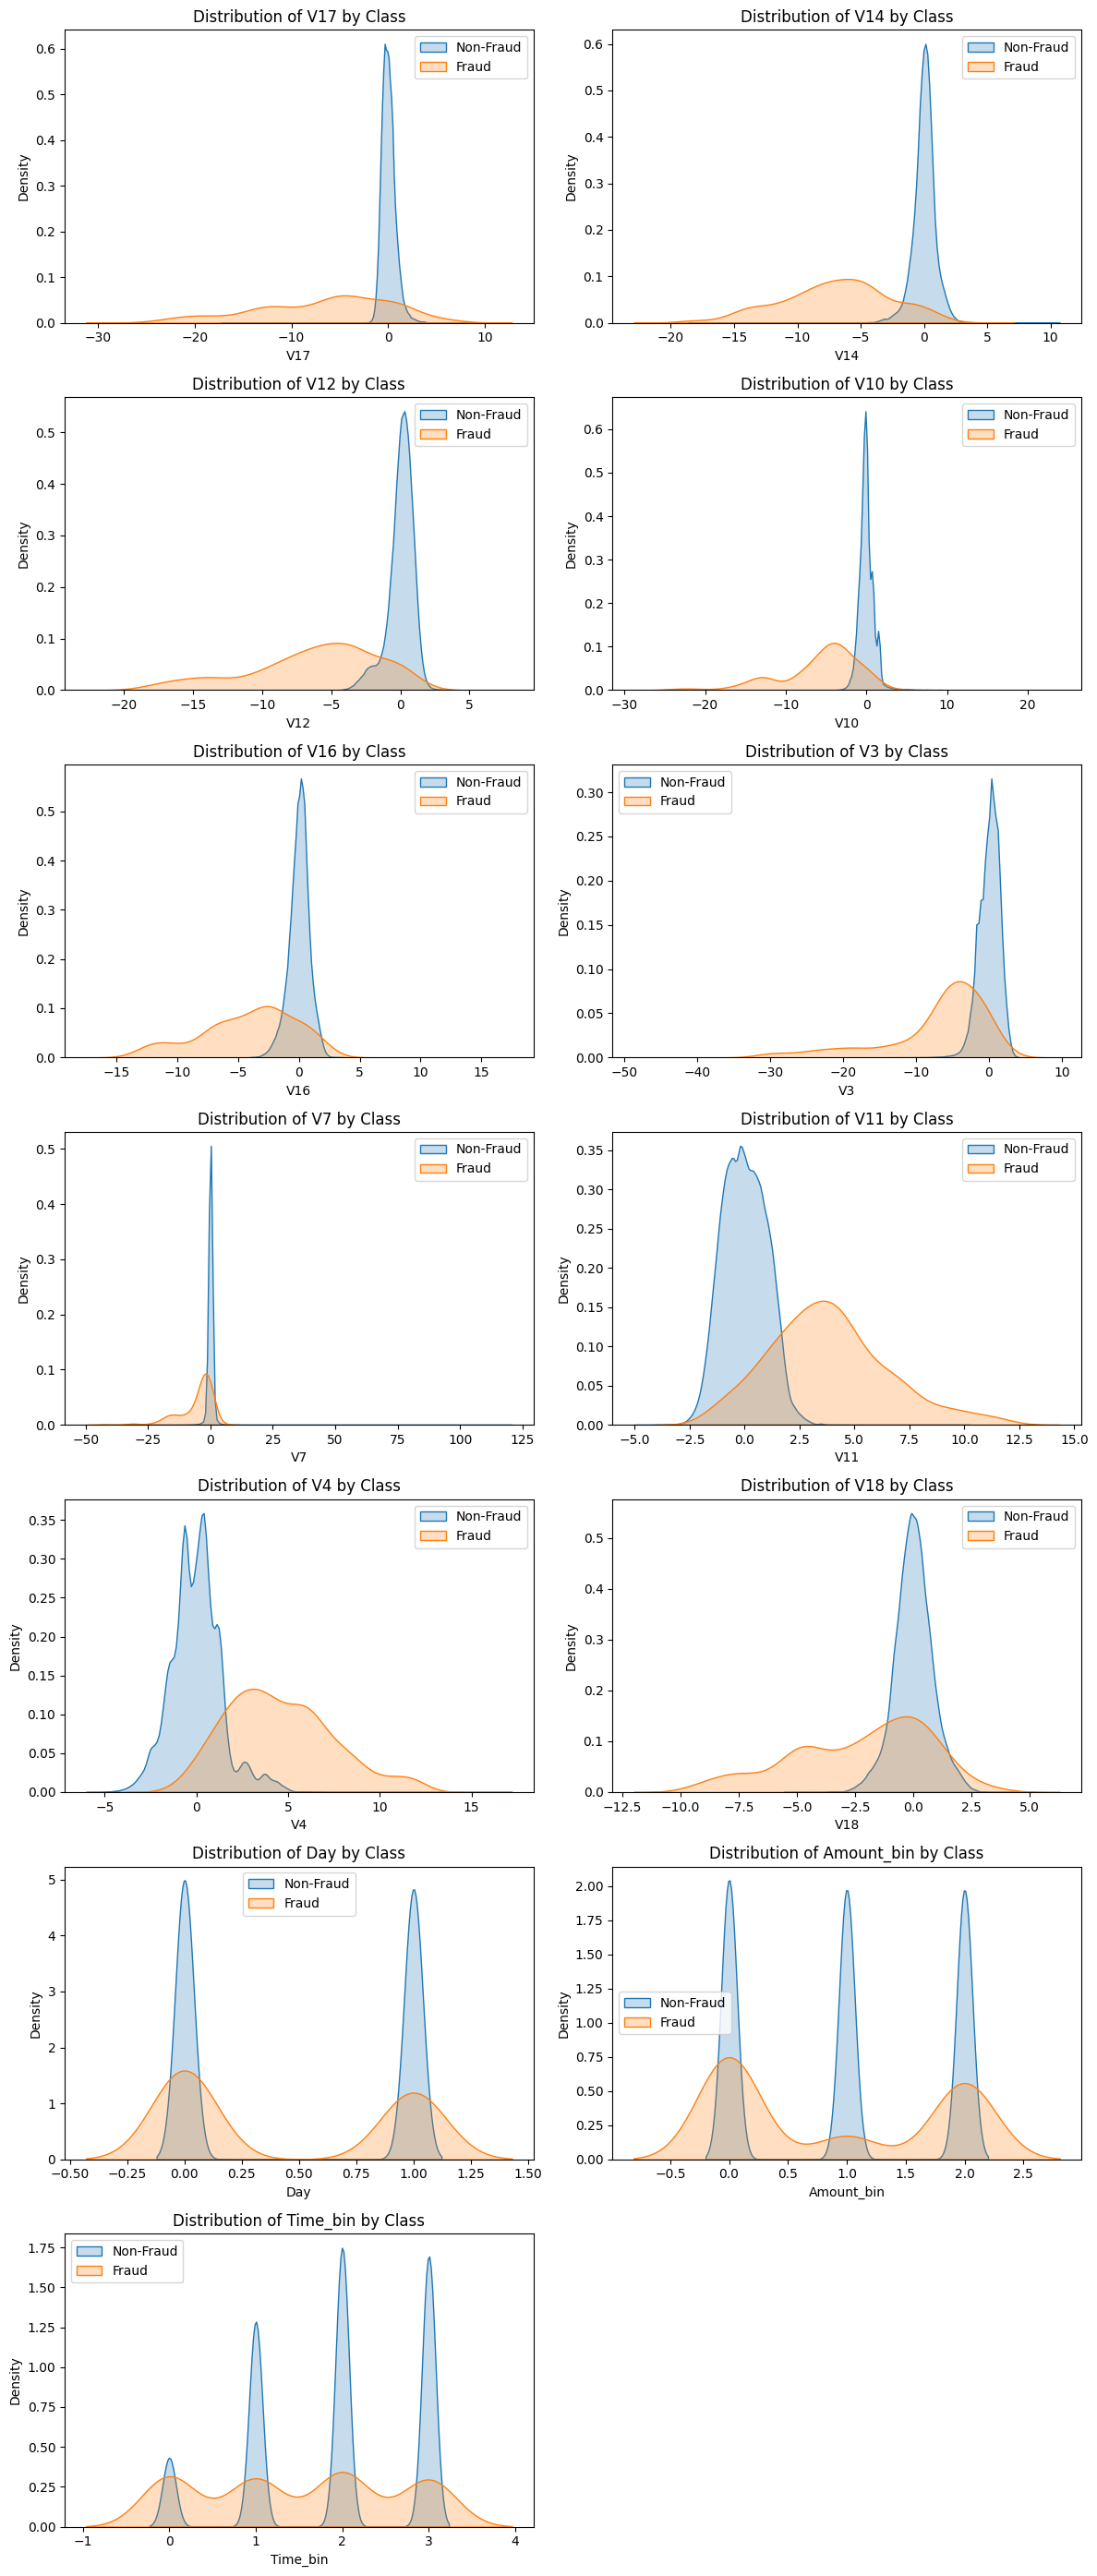

In [ ]:
# analyse distribution of top 10 features from both mi and corr


n_cols = 2
n_rows = (len(top_features) + 1) // n_cols
plt.figure(figsize=(12, n_rows * 4))

for i, feature in enumerate(top_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', fill=True)
    sns.kdeplot(df[df['Class']==1][feature], label='Fraud', fill=True)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

Combined bottom features (no duplicates): ['V22', 'V23', 'V25', 'V15', 'V26', 'V13', 'Day', 'Amount', 'Amount_bin', 'V24', 'V20', 'V19']


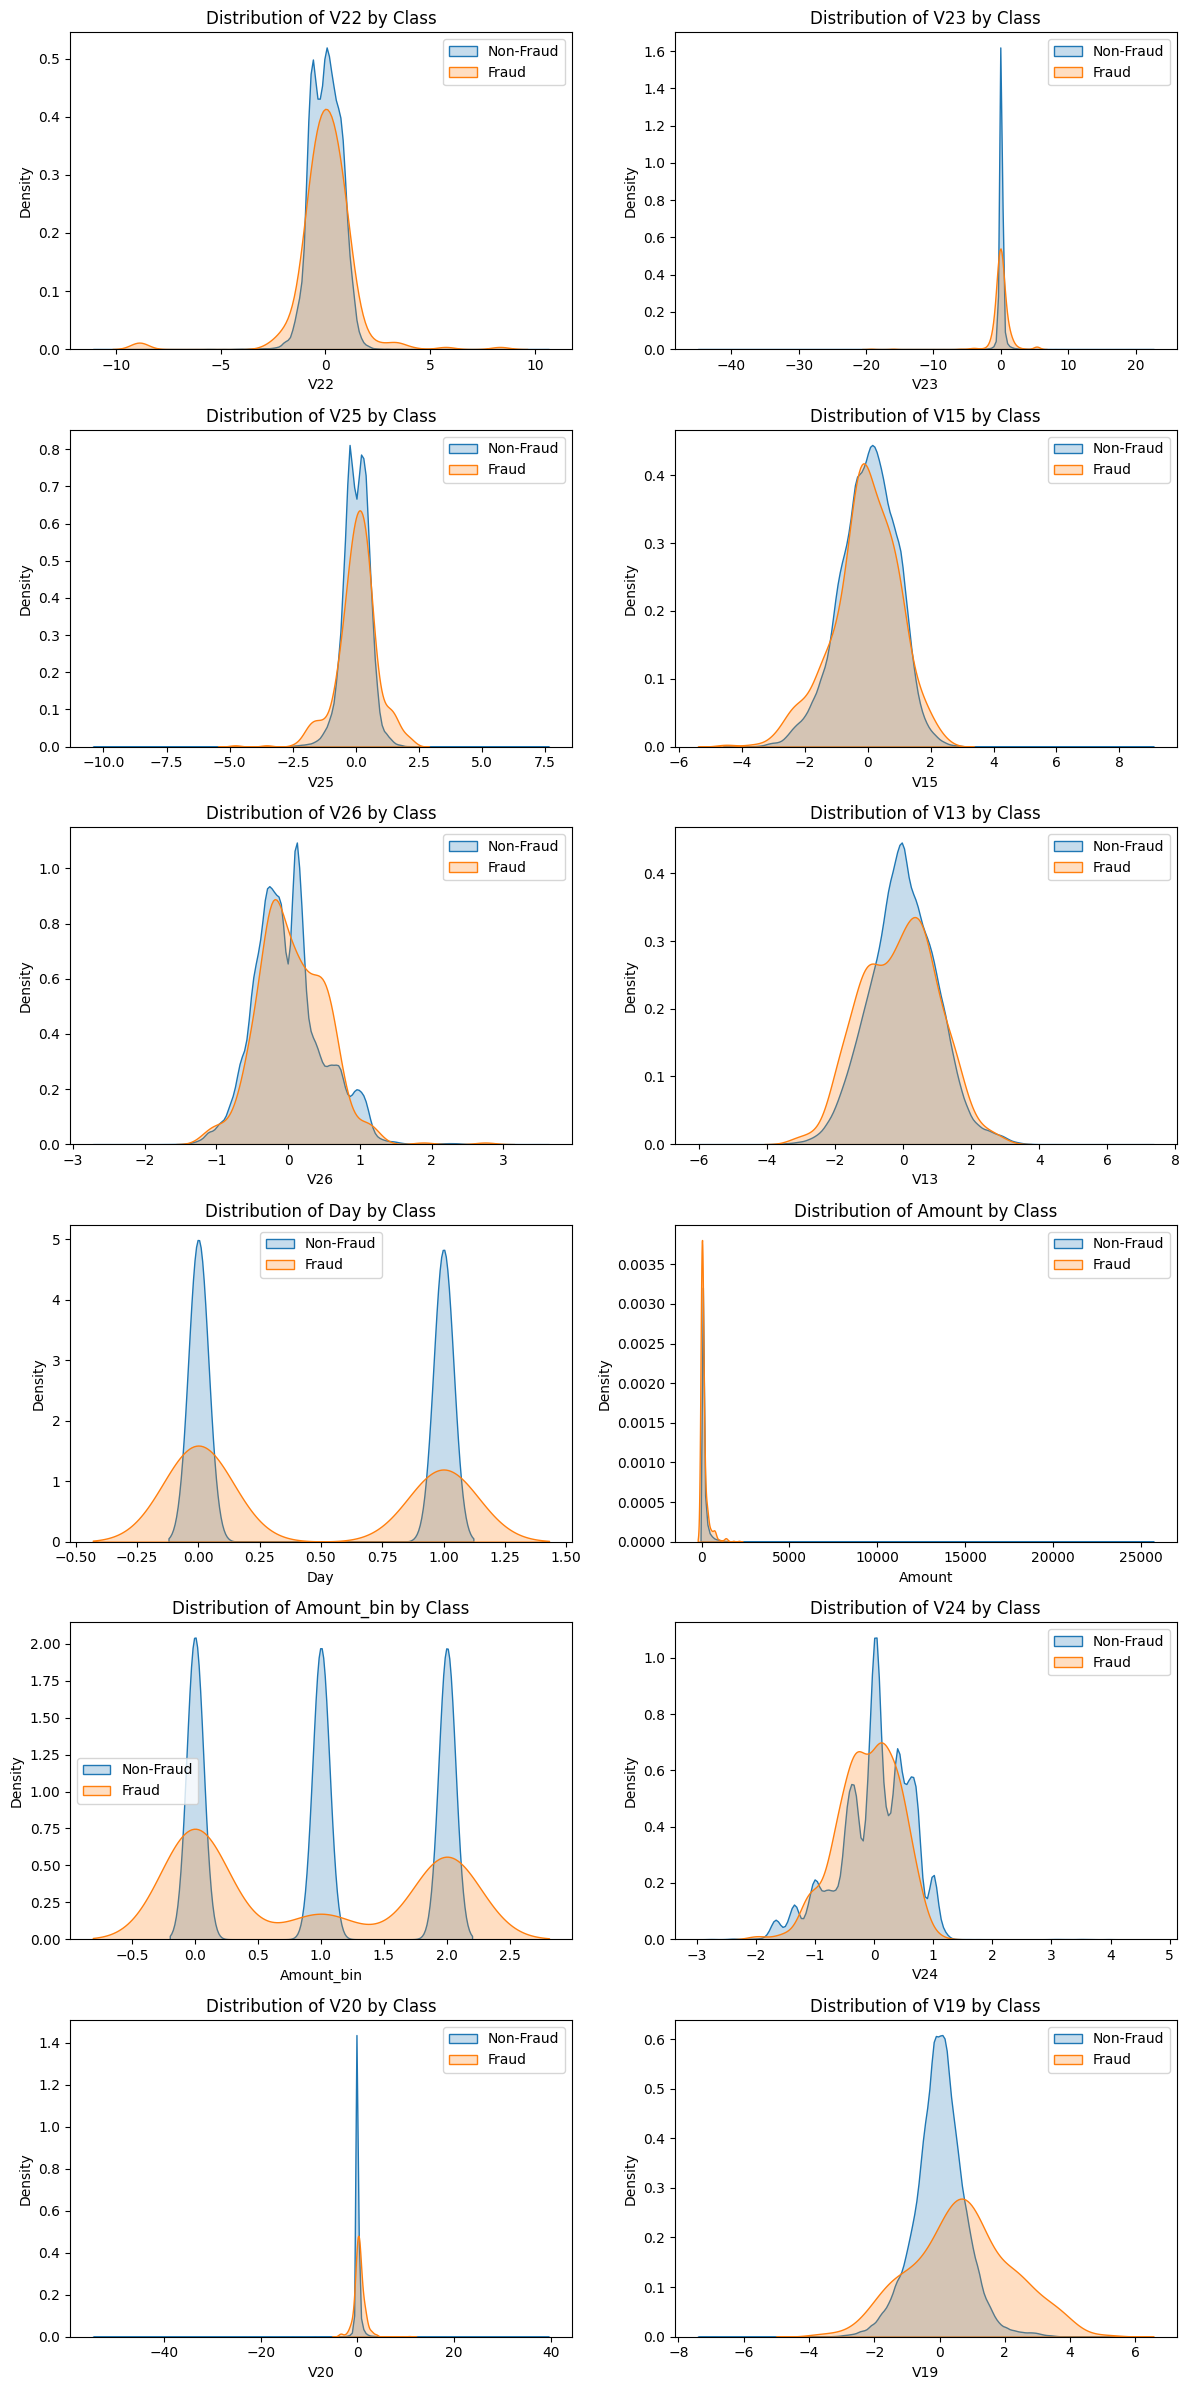

In [ ]:
# analyse distribution of bottom 10 features from both mi and corr
bottom_corr_features = fraud_corr.abs().sort_values(ascending=True).head(10).index.tolist()
bottom_mi_features = mi_scores_df.sort_values('MI_Score', ascending=True).head(10)['Feature'].tolist()

bottom_features = list(dict.fromkeys(bottom_corr_features + bottom_mi_features))
print("Combined bottom features (no duplicates):", bottom_features)

n_cols = 2
n_rows = (len(bottom_features) + 1) // n_cols
plt.figure(figsize=(12, n_rows * 4))

for i, feature in enumerate(bottom_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', fill=True)
    sns.kdeplot(df[df['Class']==1][feature], label='Fraud', fill=True)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

### Summary 
* Class ratio : Very imbalanced dataset
* Variance Analysis : No features with zero variance 
* Correlation Analysis between features : No high (>0.7) multicollinearity between features 
* Correlation Analysis between features and target variable : All features have some linear correlation between the feature and target 
* MI : All features contribute to the prediction of the target variable by themselves in some way
* For features that have the highest correlation and MI, the distributions between fraud and non fraud are very different 

### Next Steps :
* Choosing an appropriate classification metric
* Train a baseline model 